In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [5]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [6]:
cdf = df[["CYLINDERS", "ENGINESIZE", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.sample(5)

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS
1010,4,2.7,10.2,235
862,4,1.6,7.7,177
46,10,5.2,15.4,354
19,4,2.0,8.8,202
781,4,1.6,7.8,179


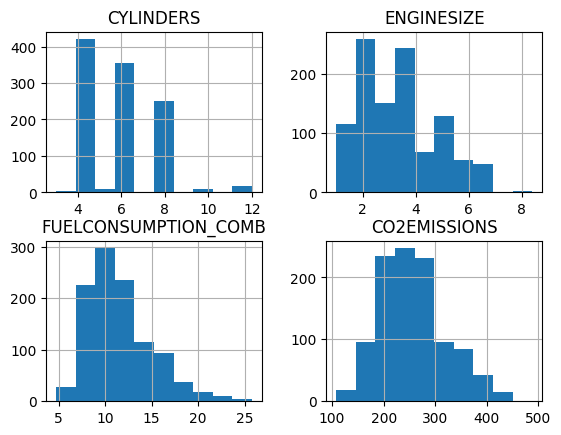

In [7]:
cdf.hist()
plt.show()

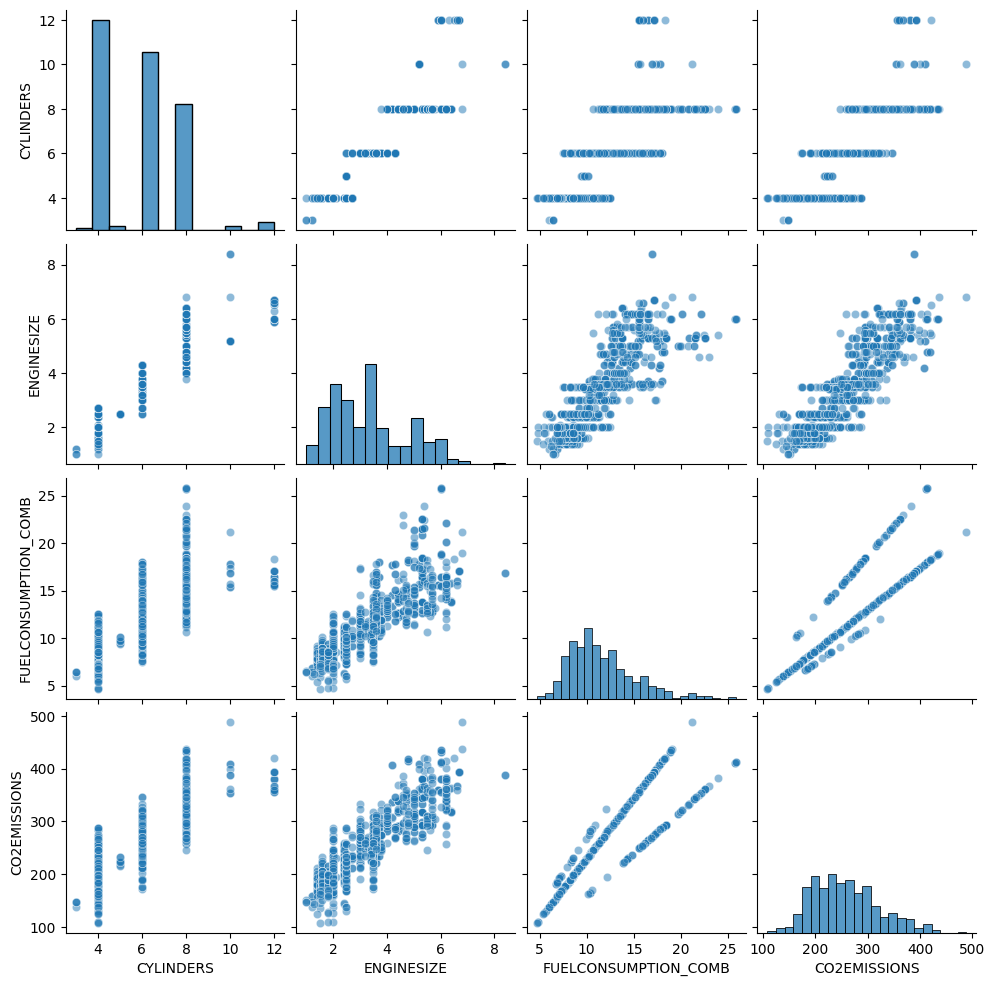

In [8]:
sns.pairplot(cdf, kind='scatter', plot_kws={'alpha' : 0.5})

In [9]:
cdf.corr()["CO2EMISSIONS"]

CYLINDERS               0.849685
ENGINESIZE              0.874154
FUELCONSUMPTION_COMB    0.892129
CO2EMISSIONS            1.000000
Name: CO2EMISSIONS, dtype: float64

In [10]:
X = cdf.ENGINESIZE.to_numpy().reshape(-1, 1)
y = cdf.CO2EMISSIONS.to_numpy()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Coef: ", lr.coef_[0])
print("Intercept: ", lr.intercept_)

Coef:  38.98292922118801
Intercept:  126.35436294238275


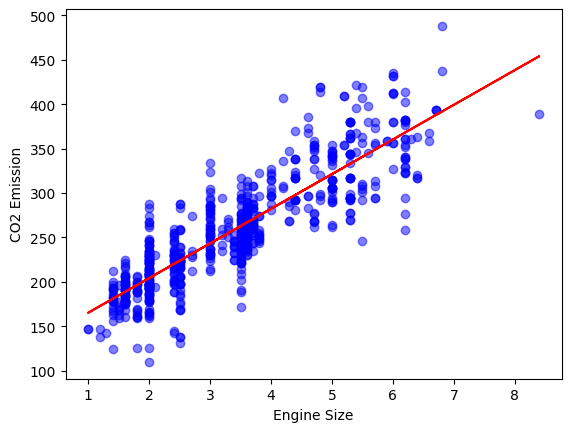

In [13]:
plt.scatter(X_train, y_train, color = 'blue', alpha=0.5)
plt.plot(X_train, lr.intercept_ + X_train*lr.coef_[0], '-r')
plt.ylabel("CO2 Emission")
plt.xlabel("Engine Size")
plt.show()

In [14]:
y_hat = lr.predict(X_test)

print("MAE: ", mean_absolute_error(y_test, y_hat))
print("MSE: ", mean_squared_error(y_test, y_hat))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_hat)))
print("R2: ", r2_score(y_test, y_hat))

MAE:  23.045310353866185
MSE:  904.109398261533
RMSE:  30.068411967736722
R2:  0.7758497416185163


In [15]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy().reshape(-1, 1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
lr1 = LinearRegression()

lr1.fit(X_train, y_train)

print("Coef: ", lr1.coef_[0])
print("Intercept: ", lr1.intercept_)

Coef:  16.156306155583543
Intercept:  69.20775487298732


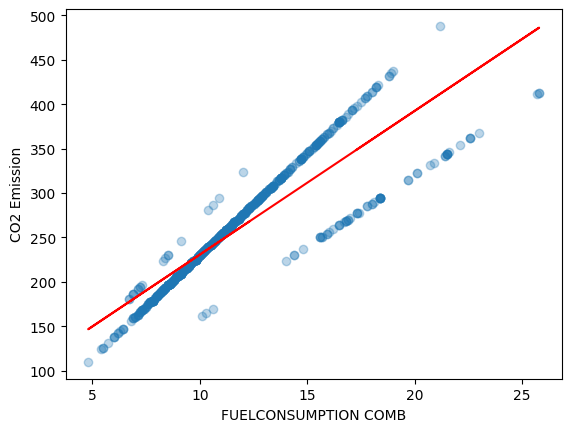

In [18]:
plt.scatter(X_train, y_train, alpha= 0.3)
plt.plot(X_train, lr1.coef_[0]*X_train + lr1.intercept_, '-r')
plt.ylabel("CO2 Emission")
plt.xlabel("FUELCONSUMPTION COMB")
plt.show()

In [19]:
y_hat1 = lr1.predict(X_test)

print("MAE: ", mean_absolute_error(y_test, y_hat1))
print("MSE: ", mean_squared_error(y_test, y_hat1))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_hat1)))
print("R2: ", r2_score(y_test, y_hat1))

MAE:  20.762901664763724
MSE:  806.347573270993
RMSE:  28.396259846518397
R2:  0.8000872270086814


In [20]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [25]:
firstVal = lr.predict([[3.5]])
print(firstVal)

[262.79461522]
